In [ ]:
# Install dependencies (most are preinstalled in Colab)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image
import matplotlib.pyplot as plt


Saving leaf.jpg to leaf (1).jpg


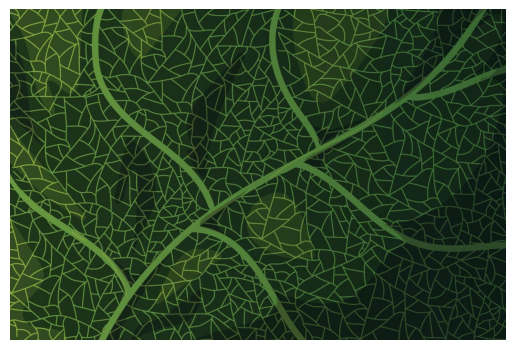

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload the file
uploaded = files.upload()  # select plant.jpg from your computer

# Since you know the filename
img = Image.open("leaf.jpg").convert("RGB")

# Show the image
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Load your image
img = Image.open("leaf.jpg")  # replace with your image path

# Target size
target_height = 984
target_width = 1472

transform = transforms.Compose([
    transforms.Resize((target_height, target_width)),  # height, width
    transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0)  # add batch dimension
print("Resized Image Tensor shape:", img_tensor.shape)


Resized Image Tensor shape: torch.Size([1, 3, 984, 1472])


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.enc1 = nn.Conv2d(3, 16, 3, stride=2, padding=1)
        self.enc2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        self.enc3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)

        # Decoder
        self.dec1 = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1)
        self.dec2 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
        self.dec3 = nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=0)
        self.act = nn.Sigmoid()

    def forward(self, x):
        # Encode
        x = torch.relu(self.enc1(x))
        x = torch.relu(self.enc2(x))
        x = torch.relu(self.enc3(x))

        # Decode
        x = torch.relu(self.dec1(x))
        x = torch.relu(self.dec2(x))
        x = self.dec3(x)
        x = self.act(x)
        return x


In [ ]:
transform = transforms.Compose([
    transforms.Resize((984, 1472)),  # full size
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((246, 368)),  # 1/4 size of original
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
img_tensor = img_tensor.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 200
model.train()
for epoch in range(epochs):
    output = model(img_tensor)
    loss = criterion(output, img_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")


RuntimeError: The size of tensor a (248) must match the size of tensor b (246) at non-singleton dimension 2

In [ ]:
with torch.no_grad():
    compressed = model.encoder(img_tensor)
    reconstructed = model.decoder(compressed)

fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Original
axs[0].imshow(img_tensor.squeeze().permute(1, 2, 0))
axs[0].set_title("Original")
axs[0].axis("off")

# Compressed (first channel only)
axs[1].imshow(compressed[0, 0].cpu(), cmap="viridis")
axs[1].set_title("Compressed (one channel)")
axs[1].axis("off")

# Reconstructed
axs[2].imshow(reconstructed.squeeze().permute(1, 2, 0))
axs[2].set_title("Reconstructed")
axs[2].axis("off")

plt.show()

# Save reconstructed image
save_image(reconstructed, "reconstructed.png")


Compressed shape: torch.Size([1, 64, 16, 16])


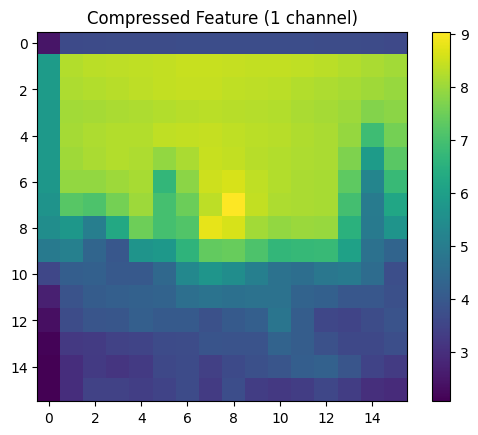

In [ ]:
# Get compressed (encoded) representation
with torch.no_grad():
    compressed = model.encoder(img_tensor)

print("Compressed shape:", compressed.shape)

# compressed will be [1, 64, 16, 16] (example)
# Let's take the first channel and show it as a heatmap
plt.imshow(compressed[0, 0].cpu(), cmap="viridis")
plt.title("Compressed Feature (1 channel)")
plt.colorbar()
plt.show()


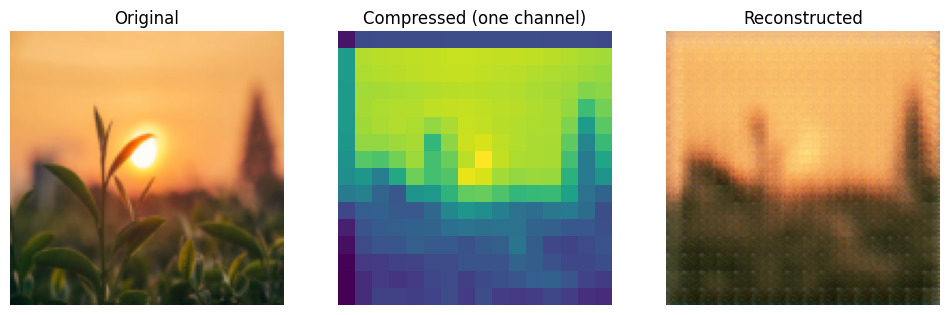

In [ ]:
with torch.no_grad():
    compressed = model.encoder(img_tensor)
    reconstructed = model.decoder(compressed)

fig, axs = plt.subplots(1, 3, figsize=(12,4))

# Original
axs[0].imshow(img_tensor.squeeze().permute(1, 2, 0))
axs[0].set_title("Original")
axs[0].axis("off")

# Compressed (take first channel of feature map)
axs[1].imshow(compressed[0, 0].cpu(), cmap="viridis")
axs[1].set_title("Compressed (one channel)")
axs[1].axis("off")

# Reconstructed
axs[2].imshow(reconstructed.squeeze().permute(1, 2, 0))
axs[2].set_title("Reconstructed")
axs[2].axis("off")

plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms

# ---------------------------
# Load and preprocess image
# ---------------------------
img_path = "leaf.jpg"  # replace with your image path
img = Image.open(img_path)

# Keep normal image size
target_height = 984
target_width = 1472

transform = transforms.Compose([
    transforms.Resize((target_height, target_width)),  # exact size
    transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0)  # add batch dimension
print("Image tensor shape:", img_tensor.shape)  # [1, 3, 984, 1472]

# ---------------------------
# Device setup
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)

# ---------------------------
# Define Autoencoder
# ---------------------------
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.enc1 = nn.Conv2d(3, 16, 3, stride=2, padding=1)
        self.enc2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        self.enc3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)

        # Decoder
        self.dec1 = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1)
        self.dec2 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
        self.dec3 = nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=0)

    def forward(self, x):
        # Encode
        x = torch.relu(self.enc1(x))
        x = torch.relu(self.enc2(x))
        x = torch.relu(self.enc3(x))

        # Decode
        x = torch.relu(self.dec1(x))
        x = torch.relu(self.dec2(x))
        x = self.dec3(x)

        # Ensure output exactly matches input size
        _, _, h, w = x.shape
        h_in, w_in = img_tensor.size(2), img_tensor.size(3)

        # Crop or pad height
        if h > h_in:
            x = x[:, :, :h_in, :]
        elif h < h_in:
            pad_h = h_in - h
            x = nn.functional.pad(x, (0, 0, 0, pad_h))

        # Crop or pad width
        if w > w_in:
            x = x[:, :, :, :w_in]
        elif w < w_in:
            pad_w = w_in - w
            x = nn.functional.pad(x, (0, pad_w, 0, 0))

        x = torch.sigmoid(x)
        return x

# ---------------------------
# Initialize model, loss, optimizer
# ---------------------------
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------------
# Training loop
# ---------------------------
epochs = 200
model.train()

for epoch in range(epochs):
    output = model(img_tensor)
    loss = criterion(output, img_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")


Image tensor shape: torch.Size([1, 3, 984, 1472])
Epoch [50/200], Loss: 0.017635
Epoch [100/200], Loss: 0.007172
Epoch [150/200], Loss: 0.006030
Epoch [200/200], Loss: 0.004456


Original Image: 2145.97 KB
Reconstructed Image: 2496.98 KB
Compressed Image: 230.74 KB


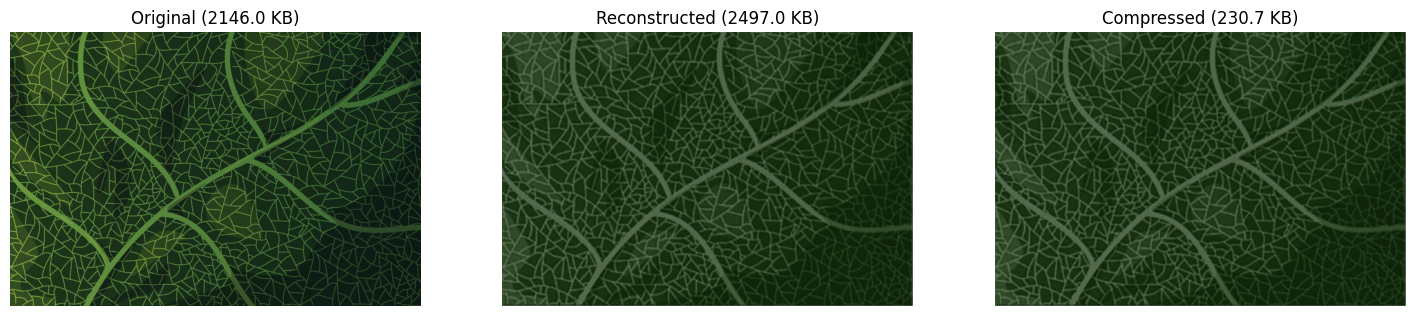

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import os

# ---------------------------
# Put model in evaluation mode
# ---------------------------
model.eval()

with torch.no_grad():
    # Pass the image through the autoencoder
    reconstructed = model(img_tensor)

# Move tensor to CPU and remove batch dimension
reconstructed = reconstructed.squeeze(0).cpu()

# Convert from [C, H, W] to [H, W, C] for plotting
reconstructed_img = TF.to_pil_image(reconstructed)

# ---------------------------
# Save images and check sizes
# ---------------------------
# Original image
original_path = "original_image.png"
img.save(original_path)
original_size = os.path.getsize(original_path) / 1024  # KB

# Reconstructed image
reconstructed_path = "reconstructed_image.png"
reconstructed_img.save(reconstructed_path)
reconstructed_size = os.path.getsize(reconstructed_path) / 1024  # KB

# Compressed image (JPEG)
compressed_path = "compressed_image.jpg"
reconstructed_img.save(compressed_path, quality=85)
compressed_size = os.path.getsize(compressed_path) / 1024  # KB

print(f"Original Image: {original_size:.2f} KB")
print(f"Reconstructed Image: {reconstructed_size:.2f} KB")
print(f"Compressed Image: {compressed_size:.2f} KB")

# ---------------------------
# Display all three images
# ---------------------------
plt.figure(figsize=(18,6))

# Original
plt.subplot(1,3,1)
plt.title(f"Original ({original_size:.1f} KB)")
plt.imshow(img)
plt.axis('off')

# Reconstructed
plt.subplot(1,3,2)
plt.title(f"Reconstructed ({reconstructed_size:.1f} KB)")
plt.imshow(reconstructed_img)
plt.axis('off')

# Compressed
plt.subplot(1,3,3)
plt.title(f"Compressed ({compressed_size:.1f} KB)")
plt.imshow(TF.to_pil_image(TF.to_tensor(reconstructed_img)))  # ensure display
plt.axis('off')

plt.show()


In [ ]:
import numpy as np

# Convert reconstructed image tensor to numpy array
reconstructed_array = reconstructed.permute(1, 2, 0).cpu().numpy()  # [H, W, C]

# Save the array to disk as .npy (NumPy binary format)
np.save("reconstructed_matrix.npy", reconstructed_array)

# Optionally, you can also save as text for readability
np.savetxt("reconstructed_matrix.txt", reconstructed_array.reshape(-1, 3), fmt='%.6f')

print("Reconstructed image matrix saved as 'reconstructed_matrix.npy' and 'reconstructed_matrix.txt'")


Reconstructed image matrix saved as 'reconstructed_matrix.npy' and 'reconstructed_matrix.txt'


In [ ]:
import numpy as np

# Convert reconstructed image tensor to numpy array
reconstructed_array = reconstructed.permute(1, 2, 0).cpu().numpy()  # [H, W, C]

# Option 1: Print full array (can be huge!)
# print(reconstructed_array)

# Option 2: Print a small patch (first 5x5 pixels)
print("Reconstructed image patch (5x5 pixels, RGB values):")
print(reconstructed_array[:5, :5, :])

# Option 3: Print basic statistics
print("\nReconstructed image statistics:")
print("Min:", reconstructed_array.min())
print("Max:", reconstructed_array.max())
print("Mean:", reconstructed_array.mean())
print("Shape:", reconstructed_array.shape)


Reconstructed image patch (5x5 pixels, RGB values):
[[[0.22834311 0.32289398 0.21639028]
  [0.22258906 0.30963552 0.18062584]
  [0.2063764  0.30297014 0.18656711]
  [0.20418581 0.28167254 0.17696935]
  [0.17740688 0.28735748 0.16980413]]

 [[0.23626165 0.3306717  0.22190365]
  [0.22721857 0.31619778 0.21772358]
  [0.2233736  0.31093556 0.19262344]
  [0.2081198  0.2809002  0.19474691]
  [0.20426485 0.29262918 0.18668802]]

 [[0.2552995  0.32979196 0.21237095]
  [0.2249426  0.31473973 0.21228544]
  [0.21209443 0.30533245 0.21413302]
  [0.20911239 0.29865605 0.17915072]
  [0.2091747  0.30393222 0.17434557]]

 [[0.24849427 0.33715704 0.24765466]
  [0.23114118 0.32338458 0.23885639]
  [0.23555206 0.3284495  0.22114247]
  [0.21128517 0.2953943  0.20807993]
  [0.21894084 0.30238357 0.20469385]]

 [[0.2558467  0.33847517 0.24926521]
  [0.2415311  0.32868883 0.20874082]
  [0.23686361 0.32970145 0.22103427]
  [0.23394613 0.30843025 0.20314413]
  [0.21920471 0.30975297 0.19890577]]]

Reconstructe

Final reconstructed image patch (5x5 pixels, RGB):
[[[58 82 55]
  [56 78 46]
  [52 77 47]
  [52 71 45]
  [45 73 43]]

 [[60 84 56]
  [57 80 55]
  [56 79 49]
  [53 71 49]
  [52 74 47]]

 [[65 84 54]
  [57 80 54]
  [54 77 54]
  [53 76 45]
  [53 77 44]]

 [[63 85 63]
  [58 82 60]
  [60 83 56]
  [53 75 53]
  [55 77 52]]

 [[65 86 63]
  [61 83 53]
  [60 84 56]
  [59 78 51]
  [55 78 50]]]

Compressed image patch (5x5 pixels, RGB):
[[[59 82 56]
  [56 79 53]
  [53 76 50]
  [50 73 47]
  [49 73 47]]

 [[60 83 57]
  [57 80 54]
  [54 77 51]
  [51 74 48]
  [50 73 47]]

 [[63 83 58]
  [61 81 56]
  [58 78 53]
  [54 74 49]
  [53 73 48]]

 [[64 84 59]
  [63 83 58]
  [60 80 55]
  [56 76 51]
  [54 74 49]]

 [[65 85 58]
  [64 84 57]
  [60 80 53]
  [57 77 50]
  [56 76 49]]]

Difference statistics (final epoch):
Min diff: 0
Max diff: 44
Mean diff: 3.1816254363290914


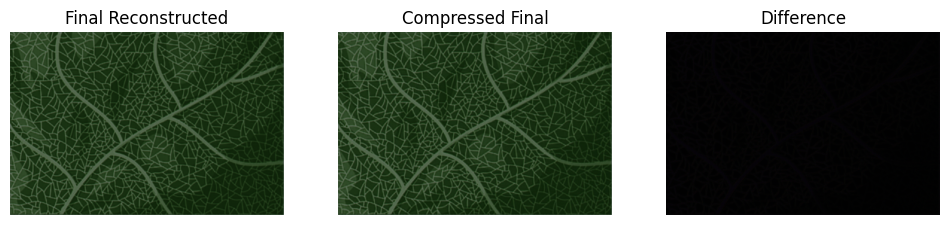

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------------------------
# After training loop, final reconstructed image
# ---------------------------
model.eval()
with torch.no_grad():
    final_reconstructed = model(img_tensor).squeeze(0).cpu()

# Convert to PIL image
final_reconstructed_img = TF.to_pil_image(final_reconstructed)

# Save compressed version
compressed_path = "compressed_final.jpg"
final_reconstructed_img.save(compressed_path, quality=85)

# Load compressed image
compressed_img = Image.open(compressed_path)

# Convert both images to NumPy arrays
reconstructed_array = np.array(final_reconstructed_img)
compressed_array = np.array(compressed_img)

# Print a small patch (top-left 5x5 pixels)
print("Final reconstructed image patch (5x5 pixels, RGB):")
print(reconstructed_array[:5, :5, :])

print("\nCompressed image patch (5x5 pixels, RGB):")
print(compressed_array[:5, :5, :])

# Compute difference matrix
diff_array = np.abs(reconstructed_array.astype(int) - compressed_array.astype(int))
print("\nDifference statistics (final epoch):")
print("Min diff:", diff_array.min())
print("Max diff:", diff_array.max())
print("Mean diff:", diff_array.mean())

# Display images side by side
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Final Reconstructed")
plt.imshow(final_reconstructed_img)
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Compressed Final")
plt.imshow(compressed_img)
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(diff_array.astype(np.uint8))
plt.axis('off')

plt.show()


In [ ]:
from PIL import Image
import numpy as np

# Load the compressed image (JPEG)
compressed_img = Image.open("compressed_final.jpg")

# Convert to NumPy array (shape: H x W x C)
compressed_array = np.array(compressed_img)

# Optional: save the matrix as .npy or .txt
np.save("compressed_matrix.npy", compressed_array)
np.savetxt("compressed_matrix.txt", compressed_array.reshape(-1, 3), fmt='%d')

# Print a small patch (top-left 5x5 pixels)
print("Compressed image patch (5x5 pixels, RGB values):")
print(compressed_array[:5, :5, :])

# Print basic statistics
print("\nCompressed image statistics:")
print("Shape:", compressed_array.shape)
print("Min:", compressed_array.min())
print("Max:", compressed_array.max())
print("Mean:", compressed_array.mean())


Compressed image patch (5x5 pixels, RGB values):
[[[59 82 56]
  [56 79 53]
  [53 76 50]
  [50 73 47]
  [49 73 47]]

 [[60 83 57]
  [57 80 54]
  [54 77 51]
  [51 74 48]
  [50 73 47]]

 [[63 83 58]
  [61 81 56]
  [58 78 53]
  [54 74 49]
  [53 73 48]]

 [[64 84 59]
  [63 83 58]
  [60 80 55]
  [56 76 51]
  [54 74 49]]

 [[65 85 58]
  [64 84 57]
  [60 80 53]
  [57 77 50]
  [56 76 49]]]

Compressed image statistics:
Shape: (984, 1472, 3)
Min: 0
Max: 152
Mean: 42.73267939201131
